In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [2]:
seed = 42
np.random.seed(seed)
tf.random.set_seed(42)

In [3]:
# MNIST 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
# 정규화
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')/255

In [5]:
# 바이너리화 (one-hot encoding)
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [6]:
# 모델 생성 (프레임 설정) , 은닉층 1개
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
# Sequential()모델은 별도의 입력층이 없음
# 대신, 첫번째 Dense layer에 input_dim 존재
# 활성화함수 : relu 사용
model.add(Dense(10, activation='softmax'))
# 출력결과를 10개로 분류(0~9), 다중분류 : softmax

In [7]:
# 모델실행 환경설정
model.compile(loss='categorical_crossentropy',    # loss: c범주형 크로스 엔트로피
              optimizer='adam',                   # 최적화함수 : adam
              metrics=['accuracy'])               # 측정지표 : 정확도

In [8]:
# 모델 최적화
model_dir = './model/'  # 모델 디렉토리 생성(폴더)

if not os.path.exists(model_dir):
  os.mkdir(model_dir)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'  # 모델 저장경로 생성
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
# val_loss를 monitoring 주시함. verbose : 결과 상황판, 성능이 나아진것만 출력
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)
# val_loss를 monitoring 주시함. 성능이 x이상 돌려서 나아지지 않으면 정지(조기종료)

In [9]:
# 모델 실행 ( 학습 : 훈련용 데이터 셋으로)

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
          epochs=30, batch_size=200, verbose=1, callbacks=[early_stopping_callback, checkpointer])

# 모델 학습 : fit, 훈련용 데이터로 설정
# 검증 데이터(validation_data : 테스트 데이터 사용)
# epochs : 반복횟수, batch_size : 샘플 200개 추출, verboss : 훈련상황 보여줌
# callbacks : 조기종료, 성능개선 여부 확인

Epoch 1/30
291/300 [============================>.] - ETA: 0s - loss: 0.3044 - accuracy: 0.9145
Epoch 1: val_loss improved from inf to 0.15274, saving model to ./model/01-0.1527.hdf5
300/300 [==============================] - 3s 6ms/step - loss: 0.3000 - accuracy: 0.9157 - val_loss: 0.1527 - val_accuracy: 0.9562
Epoch 2/30
297/300 [============================>.] - ETA: 0s - loss: 0.1241 - accuracy: 0.9643
Epoch 2: val_loss improved from 0.15274 to 0.10276, saving model to ./model/02-0.1028.hdf5
300/300 [==============================] - 2s 5ms/step - loss: 0.1239 - accuracy: 0.9644 - val_loss: 0.1028 - val_accuracy: 0.9682
Epoch 3/30
300/300 [==============================] - ETA: 0s - loss: 0.0826 - accuracy: 0.9759
Epoch 3: val_loss improved from 0.10276 to 0.08252, saving model to ./model/03-0.0825.hdf5
300/300 [==============================] - 2s 6ms/step - loss: 0.0826 - accuracy: 0.9759 - val_loss: 0.0825 - val_accuracy: 0.9755
Epoch 4/30
300/300 [==============================

In [10]:
# 테스트 정확도 출력
print('\n Test Accuracy : %.4f'%(model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.0636 - accuracy: 0.9832

 Test Accuracy : 0.9832


In [11]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

In [12]:
# 학습용 셋의 오차
y_loss = history.history['loss']

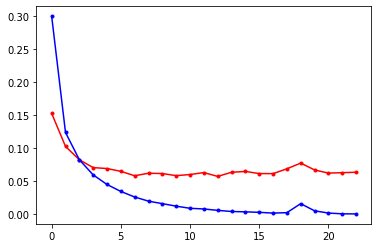

In [13]:
# 그래프로 표현
x_len=np.arange(len(y_vloss))
plt.plot(x_len, y_vloss, marker = '.', c='r', label='Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c='b', label='Testset_loss')

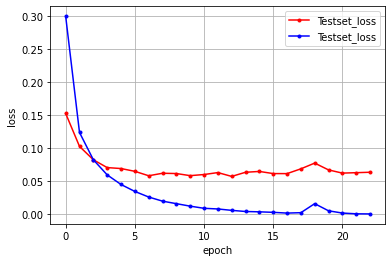

In [14]:
# 그래프로 표현
x_len=np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c='r', label='Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c='b', label='Testset_loss')

# 격자무늬 추가, 레이블 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()